# Wrangling and Analyze Data: We Rate Dogs
## by Damla Cörüt

## Introduction

In this project, we will be wrangling and analyzing and visualizing the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 

Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it.

## Data Gathering
1. First I will gather the data by directly downloading it.

In [1]:
#importing numoy and pandas libraries
import pandas as pd
import numpy as np

# read csv file
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. I will use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
# import request library
import requests

#gather data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
data = requests.get(url)

#save and read data
with open (url.split('/')[-1], mode='wb') as file:
    file.write(data.content)
image_prediction_df = pd.read_csv('image-predictions.tsv', sep='\t')
image_prediction_df.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. I will use the Tweepy library to query additional data via the Twitter API (tweet_json.txt). I couldn't get developer account from Twitter, so I will continue by using method provided by Udacity.

In [97]:
#import tweepy library
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921


KeyboardInterrupt: 

In [3]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Read downloaded txt file line by line into a pandas DataFrame
df_list = []
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        parsed_json = json.loads(line)
        df_list.append({'tweet_id': parsed_json['id'],
                        'retweet_count': parsed_json['retweet_count'],
                        'favorite_count': parsed_json['favorite_count']})
        
tweet_json_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

tweet_json_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data

In this section, I will go over the quality and tidiness issues. First I will eximine all three datasets.

In [4]:
#take a look at last five value
archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [5]:
#Check null objects and object types
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
#Check duplicated rows
archive_df[archive_df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [7]:
#Check if any duplicated tweet id's.
archive_df[archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [8]:
#Check if there are ratings that doesnt't have rating_denominator 10.

In [9]:
(archive_df['rating_denominator'] != 10).sum()

23

In [10]:
#check the dog names
archive_df['name'].value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Tucker         10
Penny          10
Lola           10
Winston         9
Bo              9
Sadie           8
the             8
an              7
Bailey          7
Daisy           7
Toby            7
Buddy           7
Bella           6
Jack            6
Rusty           6
Koda            6
Oscar           6
Jax             6
Stanley         6
Scout           6
Milo            6
Leo             6
Dave            6
Louis           5
             ... 
Bobby           1
Ralphson        1
Furzey          1
Traviss         1
Comet           1
Amy             1
Dot             1
Harry           1
Einstein        1
Alfy            1
Devón           1
Karl            1
Rooney          1
Philippe        1
Clyde           1
Sonny           1
Cecil           1
Remus           1
Pete            1
Herb            1
Mabel           1
Bowie           1
Rizzo           1
Tom             1
officially

In [11]:
#Check source types.
archive_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [12]:
#Check null objects and object types
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
#Check duplicated rows
image_prediction_df[image_prediction_df.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [14]:
#check values of p1
image_prediction_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
Shetland_sheepdog             18
teddy                         18
beagle                        18
Maltese_dog                   18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [15]:
#check values of p2
image_prediction_df.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Eskimo_dog                         27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
malinois                           20
chow                               20
miniature_pinscher                 20
Samoyed                            20
toy_terrier                        20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [16]:
#check values of p3
image_prediction_df.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
b

In [17]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [18]:
tweet_json_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


### Quality issues

1. Retweets and replies should be removed from archive_df since we are interested in the ratings data only.

2. Columns related to retweets and replies should be removed later since they are not our interest.

3. On archive_df timestamp should be a datetime format.

4. On some dog names, single letters like 'a' used instead of null also some of them doesnt't make sense.


5. We only need the most accurate prediction on image data, others are unnecessary for our analysis.

6. Dog breed predictions should be on a standart. Som of the starts with lower case and some of them contains '_'.

7. Both NaN and None values are used for same reference on datasets.

8. On archive_df source columns should be replaced as categories.

### Tidiness issues
1. On the archive_df (twitter_archive) dataset doggo, floofer, pupper, puppo should be on the same column as type.

2. All three datasets should be merged.

## Cleaning Data
In this section, we will clean of the issues we documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [19]:
# Make copies of original pieces of data
twitter_archive_clean = archive_df.copy()
images_prediction_clean = image_prediction_df.copy()
tweet_counts_clean = tweet_json_df.copy()

### Tidiness Issue #1: Dog Types should be in one column

####  On the archive_df (twitter_archive) dataset doggo, floofer, pupper, puppo should be on the same column as dog_type.

#### Code

In [20]:
# Extract the text from the columns into the new dog_type colunn
twitter_archive_clean['dog_type'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')


#### Test

In [21]:
twitter_archive_clean[['dog_type', 'doggo', 'floofer', 'pupper', 'puppo']].sample(10)


,dog_type,doggo,floofer,pupper,puppo
864,NaN,None,None,None,None
1115,NaN,None,None,None,None
441,NaN,None,None,None,None
1790,NaN,None,None,None,None
1390,pupper,None,None,pupper,None
829,pupper,None,None,pupper,None
877,doggo,doggo,None,None,None
2009,pupper,None,None,pupper,None
1138,pupper,None,None,pupper,None
1004,NaN,None,None,None,None


I will remove these for columns since I won't be needing it anymore.

In [22]:
#drop combined columns
twitter_archive_clean= twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'] , axis =1)


In [23]:
#check dataset
twitter_archive_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type
2154,669625907762618368,NaN,NaN,2015-11-25 21:17:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's having fun AND being safe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669625907...,12,10,Penny,NaN
1492,692828166163931137,NaN,NaN,2016-01-28 21:54:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper just descended from heaven. 12/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692828166...,12,10,None,pupper
1235,712668654853337088,NaN,NaN,2016-03-23 15:53:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sunny and Roxy. They pull things ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712668654...,10,10,Sunny,NaN
1336,705223444686888960,NaN,NaN,2016-03-03 02:49:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bode. He's a heavy sleeper. 9/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705223444...,9,10,Bode,NaN
2144,669942763794931712,NaN,NaN,2015-11-26 18:16:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Andru. He made his very own lacrosse s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669942763...,11,10,Andru,NaN
224,849336543269576704,NaN,NaN,2017-04-04 19:03:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",At first I thought this was a dog because of t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849336543...,11,10,None,NaN
1950,673688752737402881,NaN,NaN,2015-12-07 02:21:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Larry. He doesn't know how to shoe. 9/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673688752...,9,10,Larry,NaN
151,862831371563274240,NaN,NaN,2017-05-12 00:46:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zooey. She's the world's biggest fan o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/862831371...,13,10,Zooey,NaN
2088,670792680469889025,NaN,NaN,2015-11-29 02:33:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Antony. He's a Sheraton Tetrahedron. S...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670792680...,7,10,Antony,NaN
883,760252756032651264,NaN,NaN,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fido. He can tell the weather. Not goo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760252756...,4,10,Fido,NaN


### Tidiness Issue #2: All three datasets should be merged.

#### Define all three datasets should be merged on tweet_id.

#### Code

In [24]:
# First I will combine twitter_archive_clean and images_prediction_clean datasets.
tweets_all_df_1 = pd.merge(twitter_archive_clean, images_prediction_clean, on="tweet_id")


In [25]:
# Then I will combine add the third dataset
tweets_all_df = pd.merge(tweets_all_df_1, tweet_counts_clean, on="tweet_id")


#### Test

In [26]:
tweets_all_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1944,668274247790391296,NaN,NaN,2015-11-22 03:46:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sophie. Her son just got in the car to le...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668274247...,...,0.406374,True,Lakeland_terrier,0.263854,True,toy_poodle,0.150844,True,248,886
877,740365076218183684,NaN,NaN,2016-06-08 02:09:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When the photographer forgets to tell you wher...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740365076...,...,0.246313,False,Windsor_tie,0.172446,False,mushroom,0.137516,False,495,2727
1261,692417313023332352,NaN,NaN,2016-01-27 18:42:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Herschel. He's slightly bigger than ur av...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692417313...,...,0.208922,False,mink,0.169945,False,polecat,0.144494,False,3917,10275
122,863432100342583297,NaN,NaN,2017-05-13 16:33:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Belle. She's never been more pupset. E...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863432100...,...,0.690517,True,French_bulldog,0.103360,True,beagle,0.079489,True,5664,24829
1068,708845821941387268,NaN,NaN,2016-03-13 02:43:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper with magic eyes. Not wearing a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708845821...,...,0.745640,True,kelpie,0.167853,True,Boston_bull,0.014763,True,1015,3226
561,786363235746385920,NaN,NaN,2016-10-13 00:29:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rizzo. He has many talents. A true ren...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/786363235...,...,0.929266,True,Labrador_retriever,0.062867,True,Saluki,0.002157,True,4072,12189
1468,679854723806179328,NaN,NaN,2015-12-24 02:42:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. He's a rare pup. Covered in Fro...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679854723...,...,0.887963,False,ram,0.095021,False,chow,0.002307,True,1402,3143
478,798925684722855936,NaN,NaN,2016-11-16 16:28:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shadow. He's a firm believer that they...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/798925684...,...,0.539463,True,cairn,0.184897,True,Norfolk_terrier,0.163024,True,1663,8246
2023,666835007768551424,NaN,NaN,2015-11-18 04:27:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These are Peruvian Feldspars. Their names are ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666835007...,...,0.448459,True,toy_poodle,0.124030,True,teddy,0.110183,False,83,222
207,843604394117681152,NaN,NaN,2017-03-19 23:25:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hank. He's been outside for 3 minutes ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/843604394...,...,0.430583,True,golden_retriever,0.263581,True,Great_Pyrenees,0.179385,True,3081,18310


### Quality Issue #1: Retweets and replies should be removed

#### Define
Since the analysis is about original tweets that contains ratings, I will eliminate retweets and replies.

#### Code

In [27]:
# Remove retweets
tweets_all_df = tweets_all_df[tweets_all_df.retweeted_status_id.isnull()]

# Remove replies
tweets_all_df = tweets_all_df[tweets_all_df.in_reply_to_status_id.isnull()]


#### Test

In [28]:
tweets_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
dog_type                      322 non-null object
jpg_url                       1971 non-null object
img_num                       1971 non-null int64
p1                            1971 non-null object
p1_conf                       1971 non-nul

### Quality Issue #2: Columns related to retweets and replies

#### Define
Columns related to retweets and replies should be removed since they are not our interest. 

#### Code

In [29]:
#drop columns
tweets_all_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id' ,'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)


#### Test

In [30]:
tweets_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_type              322 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
retweet_count         1971 non-null int64

### Quality Issue #3: Timestamp type format

#### Define
Timestamp format should be datetime instead of object.

#### Code

In [31]:
# First I will remove the time zone from the timestamp column
tweets_all_df['timestamp'] = tweets_all_df['timestamp'].str.slice(start=0, stop=-6)

# Then I will change the 'timestamp' column to a datetime object
tweets_all_df['timestamp'] = pd.to_datetime(tweets_all_df['timestamp'], format = "%Y-%m-%d %H:%M:%S")


#### Test

In [32]:
#check values
tweets_all_df['timestamp']

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
19     2017-07-20 16:49:33
20     2017-07-19 16:06:48
21     2017-07-19 03:39:09
22     2017-07-19 00:47:34
23     2017-07-18 16:08:03
24     2017-07-18 00:07:08
25     2017-07-17 16:17:36
26     2017-07-16 23:58:41
27     2017-07-16 20:14:00
28     2017-07-15 23:25:31
29     2017-07-15 16:17:19
               ...        
2043   2015-11-17 00:24:19
2044   2015-11-17 00:06:54
2045   2015-11-16 23:23:41
2046   2015-11-16 21:54:18
2047   2015-11-16 21:10:36
2048   2015-11-16 20:32:58
2

### Quality Issue #4: Correct dog names.

#### Define

On some names single letters like 'a' are used. We will replace them with None.

#### Code

In [33]:
tweets_all_df.name = tweets_all_df.name.str.replace('^[a-z]+', 'None')

#### Test

In [34]:
tweets_all_df['name'].value_counts()

None         622
Charlie       11
Lucy          10
Oliver        10
Cooper        10
Penny          9
Tucker         9
Winston        8
Sadie          8
Daisy          7
Lola           7
Toby           7
Jax            6
Bella          6
Stanley        6
Koda           6
Bo             6
Chester        5
Oscar          5
Dave           5
Buddy          5
Milo           5
Rusty          5
Scout          5
Louis          5
Bailey         5
Leo            5
Phil           4
Jerry          4
Dexter         4
            ... 
Rambo          1
Olaf           1
Damon          1
Bradlay        1
Hubertson      1
Pinot          1
Kyro           1
Dunkin         1
Beemo          1
Marlee         1
Gustav         1
Striker        1
Rumpole        1
Ralph          1
Pip            1
Rhino          1
Andru          1
Orion          1
Tanner         1
Pavlov         1
Vinscent       1
Kellogg        1
Strudel        1
Kona           1
Keurig         1
Diogi          1
Emmie          1
Millie        

### Issue #5: We only need one prediction 

#### Define
We only need the true prediction for image predictions. So I will create that column.

#### Code

In [41]:
# I will create a new column
tweets_all_df['dog_breed'] = 'None'

In [43]:
# I will check the first value that is correct among predictions and take that as dog_breed.
# If there isn't one, it will be None.
for i, row in tweets_all_df.iterrows():

    if row.p1_dog:
        tweets_all_df.at[i,'dog_breed']=row.p1
    elif row.p2_dog and row.rating_numerator >= 10:
        tweets_all_df.at[i,'dog_breed']=row.p2
    elif row.p3_dog and row.rating_numerator >= 10:
        tweets_all_df.at[i,'dog_breed']=row.p3
    else:
        tweets_all_df.at[i, 'dog_breed']='None'

In [44]:
#Since I wont be needing p1,p2,p3 I will drop them.
tweets_all_df = tweets_all_df.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)


#### Test

In [45]:
tweets_all_df['dog_breed'].value_counts()

None                              362
golden_retriever                  154
Labrador_retriever                105
Pembroke                           93
Chihuahua                          84
pug                                60
toy_poodle                         48
chow                               46
Samoyed                            42
Pomeranian                         39
malamute                           33
French_bulldog                     30
cocker_spaniel                     30
Chesapeake_Bay_retriever           29
miniature_pinscher                 22
German_shepherd                    21
Staffordshire_bullterrier          20
Siberian_husky                     20
Eskimo_dog                         20
Maltese_dog                        19
beagle                             19
Cardigan                           19
Shetland_sheepdog                  18
Shih-Tzu                           18
Italian_greyhound                  17
Rottweiler                         17
kuvasz      

In [46]:
tweets_all_df.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,retweet_count,favorite_count,dog_breed
1527,677314812125323265,2015-12-17 02:30:09,"<a href=""http://twitter.com/download/iphone"" r...","Meet Tassy &amp; Bee. Tassy is pretty chill, b...",https://twitter.com/dog_rates/status/677314812...,10,10,Tassy,NaN,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,611,1799,Blenheim_spaniel
542,789599242079838210,2016-10-21 22:48:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Brownie. She's wearing a Halloween the...,https://twitter.com/dog_rates/status/789599242...,12,10,Brownie,NaN,https://pbs.twimg.com/media/CvU4UZpXgAE1pAV.jpg,2279,7620,Chesapeake_Bay_retriever
556,787322443945877504,2016-10-15 16:01:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Lincoln. He forgot to use his blinker ...,https://twitter.com/dog_rates/status/787322443...,10,10,Lincoln,NaN,https://pbs.twimg.com/media/Cu0hlfwWYAEdnXO.jpg,2032,8726,golden_retriever
107,867774946302451713,2017-05-25 16:10:44,"<a href=""http://twitter.com/download/iphone"" r...",Meet Harold. He's h*ckin cooperative. 13/10 g...,https://twitter.com/dog_rates/status/867774946...,13,10,Harold,NaN,https://pbs.twimg.com/media/DAr0tDZXUAEMvdu.jpg,7788,35179,Border_collie
1472,679736210798047232,2015-12-23 18:51:56,"<a href=""http://twitter.com/download/iphone"" r...",This pup's name is Sabertooth (parents must be...,https://twitter.com/dog_rates/status/679736210...,9,10,None,NaN,https://pbs.twimg.com/media/CW7oelWWcAAhyzz.jpg,918,2311,French_bulldog
251,834786237630337024,2017-02-23 15:25:23,"<a href=""http://twitter.com/download/iphone"" r...",This is Tobi. She is properly fetching her sho...,https://twitter.com/dog_rates/status/834786237...,13,10,Tobi,NaN,https://pbs.twimg.com/media/C5XBp19WYAA5a_v.jpg,6159,22943,Border_terrier
280,831262627380748289,2017-02-13 22:03:49,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's feeling h*ckin festive an...,https://twitter.com/dog_rates/status/831262627...,12,10,Tucker,NaN,https://pbs.twimg.com/media/C4k88lGVMAEKNzb.jpg,2350,13066,cocker_spaniel
15,889278841981685760,2017-07-24 00:19:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. You're witnessing one of his m...,https://twitter.com/dog_rates/status/889278841...,13,10,Oliver,NaN,https://pbs.twimg.com/ext_tw_video_thumb/88927...,5637,25652,whippet
725,759447681597108224,2016-07-30 17:56:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Oakley. He has no idea what happened h...,https://twitter.com/dog_rates/status/759447681...,11,10,Oakley,NaN,https://pbs.twimg.com/media/CooZok_WEAA7oPw.jpg,2827,9418,kuvasz
910,734912297295085568,2016-05-24 01:02:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jax. He's a literal fluffball. Sneaky ...,https://twitter.com/dog_rates/status/734912297...,10,10,Jax,NaN,https://pbs.twimg.com/media/CjLuzPvUoAAbU5k.jpg,572,2993,Maltese_dog


### Quality Issue #6: Standart dog_breed naming

#### Define
Dog breed predictions should be on a standart. Some of the starts with lower case and some of them contains '_'.

#### Code

In [47]:
#First lower case all of them
tweets_all_df['dog_breed'] = tweets_all_df['dog_breed'].str.lower()

In [48]:
#Then I will replace '-' and '_' with space.
tweets_all_df['dog_breed'] = tweets_all_df['dog_breed'].replace('_',' ', regex=True)
tweets_all_df['dog_breed'] = tweets_all_df['dog_breed'].replace('-',' ', regex=True)

#### Test

In [49]:
tweets_all_df['dog_breed'].value_counts()

none                          362
golden retriever              154
labrador retriever            105
pembroke                       93
chihuahua                      84
pug                            60
toy poodle                     48
chow                           46
samoyed                        42
pomeranian                     39
malamute                       33
french bulldog                 30
cocker spaniel                 30
chesapeake bay retriever       29
miniature pinscher             22
german shepherd                21
siberian husky                 20
staffordshire bullterrier      20
eskimo dog                     20
beagle                         19
cardigan                       19
maltese dog                    19
shetland sheepdog              18
shih tzu                       18
italian greyhound              17
rottweiler                     17
basset                         16
kuvasz                         16
lakeland terrier               15
great pyrenees

### Issue #7: NaN and None values

#### Define
NaN value is used instead of None on dog_breed since it is a tyoe object. I will replace it with None, so the reference would be the same on all table.

#### Code

In [50]:
tweets_all_df.dog_type.replace(np.NaN, 'None', inplace=True)


#### Test

In [51]:
tweets_all_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,retweet_count,favorite_count,dog_breed
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,8853,39467,none
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,6514,33819,chihuahua
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,4328,25461,chihuahua
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,8964,42908,labrador retriever
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,9774,41048,basset
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,3261,20562,chesapeake bay retriever
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,2158,12041,appenzeller
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,16716,56848,pomeranian
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,4429,28226,irish terrier
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,7711,32467,pembroke


### Quality Issue #8: Source column

#### Define
Source columns contains 4 types of application as the source of tweet and which app it comes from. So we can put those application directly instead of hard to read url.

#### Code

In [52]:
#I am replacing long references with shorter versions.
tweets_all_df.source = tweets_all_df.source.replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone',
                                                                     '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - Make a Scene',
                                                                     '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
                                                                     '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'})

#### Test

In [53]:
tweets_all_df['source'].value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [54]:
tweets_all_df.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,retweet_count,favorite_count,dog_breed
1708,672884426393653248,2015-12-04 21:05:23,Twitter for iPhone,Marvelous dog here. Rad ears. Not very soft. L...,https://twitter.com/dog_rates/status/672884426...,6,10,None,None,https://pbs.twimg.com/media/CVaQ0M4UsAAki3t.jpg,897,1661,none
906,735635087207878657,2016-05-26 00:54:06,Twitter for iPhone,This is Dakota. He hasn't grow into his skin y...,https://twitter.com/dog_rates/status/735635087...,11,10,Dakota,None,https://pbs.twimg.com/media/CjWANBlVAAAaN-a.jpg,2659,6776,pug
1986,667517642048163840,2015-11-20 01:39:42,Twitter Web Client,This is Dook &amp; Milo. Dook is struggling to...,https://twitter.com/dog_rates/status/667517642...,8,10,Dook,None,https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg,203,389,italian greyhound
397,813172488309972993,2016-12-26 00:00:03,Twitter for iPhone,This is Eleanor. She winks like she knows many...,https://twitter.com/dog_rates/status/813172488...,12,10,Eleanor,None,https://pbs.twimg.com/media/C0j4EESUsAABtMq.jpg,2236,10384,golden retriever
886,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/73923...,52360,75163,eskimo dog
1665,673709992831262724,2015-12-07 03:45:53,Twitter for iPhone,I know a lot of you are studying for finals. G...,https://twitter.com/dog_rates/status/673709992...,12,10,None,None,https://pbs.twimg.com/media/CVl_qbjW4AA8Mam.jpg,306,908,chihuahua
95,870656317836468226,2017-06-02 15:00:16,Twitter for iPhone,This is Cody. He zoomed too aggressively and t...,https://www.gofundme.com/help-fix-codys-torn-a...,13,10,Cody,None,https://pbs.twimg.com/media/DBUxSSTXsAA-Jn1.jpg,2817,12819,pembroke
1104,706346369204748288,2016-03-06 05:11:12,Twitter for iPhone,This is Koda. She's a Beneboom Cumberwiggle. 1...,https://twitter.com/dog_rates/status/706346369...,12,10,Koda,None,https://pbs.twimg.com/media/Cc1yRE2WoAAgxFQ.jpg,1035,3768,tibetan mastiff
584,782598640137187329,2016-10-02 15:10:30,Twitter for iPhone,This is Timmy. He's quite large. According to ...,https://twitter.com/dog_rates/status/782598640...,11,10,Timmy,None,https://pbs.twimg.com/media/CtxZTtxUMAEduGo.jpg,2184,8694,malamute
1997,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,None,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,234,489,saint bernard


## Storing Data
I will save cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [55]:
tweets_all_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)


## Analyzing and Visualizing Data

In [56]:
#I will install some libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import time
import datetime
%matplotlib inline

### 1. What are the most common dog breeds on original tweets?

I want to take a look at the most popular dog breeds that original tweets has.

In [57]:
#Check counts of breeds
tweets_all_df.dog_breed.value_counts()

none                          362
golden retriever              154
labrador retriever            105
pembroke                       93
chihuahua                      84
pug                            60
toy poodle                     48
chow                           46
samoyed                        42
pomeranian                     39
malamute                       33
french bulldog                 30
cocker spaniel                 30
chesapeake bay retriever       29
miniature pinscher             22
german shepherd                21
siberian husky                 20
staffordshire bullterrier      20
eskimo dog                     20
beagle                         19
cardigan                       19
maltese dog                    19
shetland sheepdog              18
shih tzu                       18
italian greyhound              17
rottweiler                     17
basset                         16
kuvasz                         16
lakeland terrier               15
great pyrenees

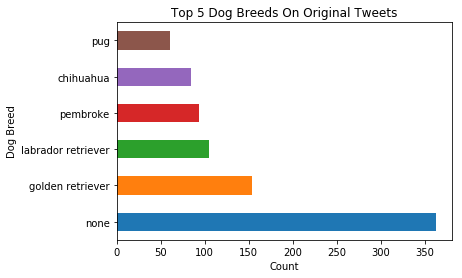

In [58]:
tweets_all_df.dog_breed.value_counts().head(6).plot(kind = 'barh', title = 'Top 5 Dog Breeds On Original Tweets')
plt.xlabel('Count')
plt.ylabel('Dog Breed');

> Golden retriever, labrador retriever, pembroke, chihuahua and pug are the most common dog breeds that contained in original tweets

### 2. What are the percentage of dog types?

I want to see the distrubution of dog types that are mentioned in tweets among original tweets

In [59]:
# Dog stage rates
tweets_all_df.dog_type.value_counts(normalize=True)

None       0.836631
pupper     0.111618
doggo      0.036022
puppo      0.014206
floofer    0.001522
Name: dog_type, dtype: float64

Text(0.5,1,'Dog Types')

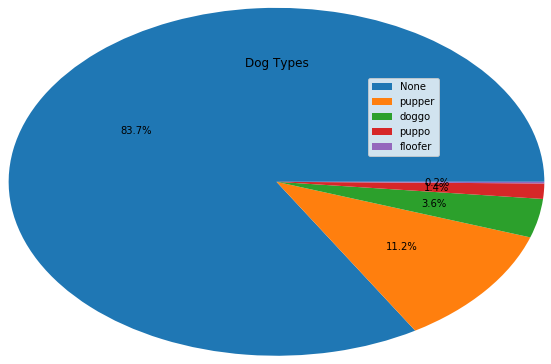

In [60]:
#I will plot a bar chart to see clearer.
labels = ['None', 'pupper', 'doggo', 'puppo', 'floofer']
values = tweets_all_df.dog_type.value_counts(normalize=True)
plt.pie(values,autopct='%1.1f%%',radius = 2.0)
plt.legend(labels, loc=0)
plt.title('Dog Types')

> More then 80 percent of the type is unknown. Pupper has the highest rate among all of them while floofer is the lowest

### 3. What is the distrubution of original tweet counts by year?

I want to see WeRateDog's original tweets over time.

In [61]:
#Extract year from timestamp.
tweets_all_df['year'] = tweets_all_df['timestamp'].dt.year

Text(0.5,1,'Tweet Count of WeRateDogs over Years')

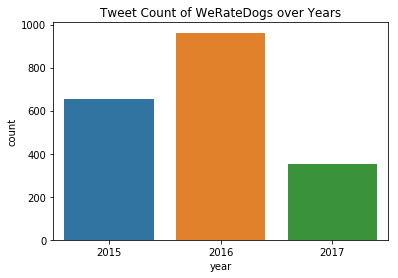

In [62]:
sns.countplot(x='year', data=tweets_all_df)
plt.title('Tweet Count of WeRateDogs over Years')

> 2016 has the most tweet counts among all three years. Bun 2017 data is untill august. So this analyze might not be totally correct.

### 4. What are the most popular dog names?

I want to see the most popular dog_names according to we rate dogs original tweets.

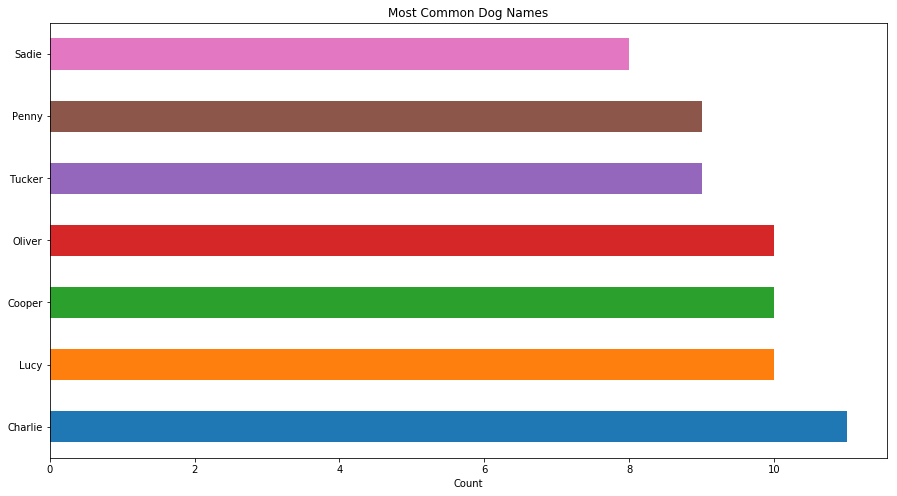

In [63]:
#First I will eliminate None's and then plot the table.
names = tweets_all_df[tweets_all_df['name'] != 'None']
names.name.value_counts()[0:7].plot('barh', figsize=(15,8), title='Most Common Dog Names').set_xlabel("Count");


> Charlie is the most common name among dogs. It is followed bt Cooper, Oliver, Lucy and Tucker.